---
# Time Series Explore Exercises
---

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rc('figure', figsize=(13, 6))
plt.rc('axes.spines', top=False, right=False)
plt.rc('font', size=13)

# no yelling in the library
import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm

import prepare as p

Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.
- For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. 
- For both datasets you should choose a method of splitting your data and only explore the training split.

---
## Store Items Data
---

In [205]:
# read in data
df = p.get_clean_sales_data()

In [206]:
# take a look
df.head(1)

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Tuesday,10.92


In [207]:
# make sure my index is being read in properly
type(df.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [208]:
# I only want to take a look at average daily total sales for right now
s = df.sales_total.resample('D').mean()
s.head()

sale_date
2013-01-01    147.68802
2013-01-02    147.14116
2013-01-03    156.33896
2013-01-04    168.93546
2013-01-05    175.24370
Freq: D, Name: sales_total, dtype: float64

In [209]:
s.index.max()

Timestamp('2017-12-31 00:00:00', freq='D')

In [210]:
s.index.min()

Timestamp('2013-01-01 00:00:00', freq='D')

In [211]:
# # I only want to take a look at average daily total sales for right now
# s = df.sales_total.resample('D').agg(['mean'])
# s.head()

---

In [212]:
store_1_sales = df.sales_total[df.store_id == 1]
store_2_sales = df.sales_total[df.store_id == 2]
store_3_sales = df.sales_total[df.store_id == 3]
store_4_sales = df.sales_total[df.store_id == 4]
store_5_sales = df.sales_total[df.store_id == 5]
store_6_sales = df.sales_total[df.store_id == 6]
store_7_sales = df.sales_total[df.store_id == 7]
store_8_sales = df.sales_total[df.store_id == 8]
store_9_sales = df.sales_total[df.store_id == 9]
store_10_sales = df.sales_total[df.store_id == 10]

---

### Plan
- Take a look at daily sales total averages for all stores
    - Recreate all plots
- Take a look at each store individually and see if things change?

### Split Data

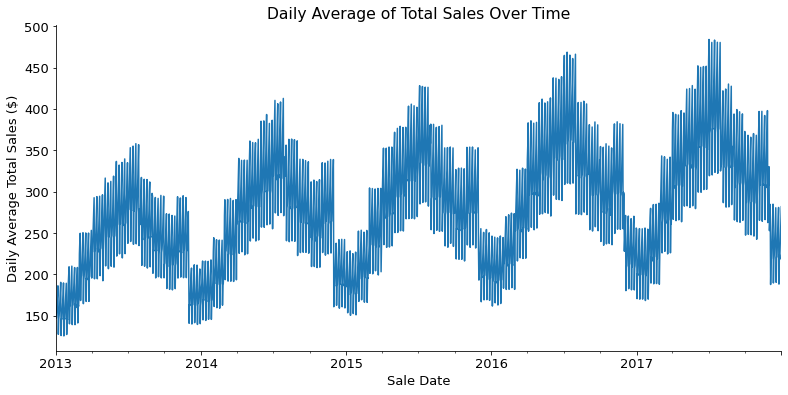

In [213]:
s.plot(title='Daily Average of Total Sales Over Time')
plt.ylabel('Daily Average Total Sales ($)')
plt.xlabel('Sale Date');

In [214]:
# looks like I should take sales from 2017 as my test split
train = s.loc[:'2016']
test = s.loc['2017':]

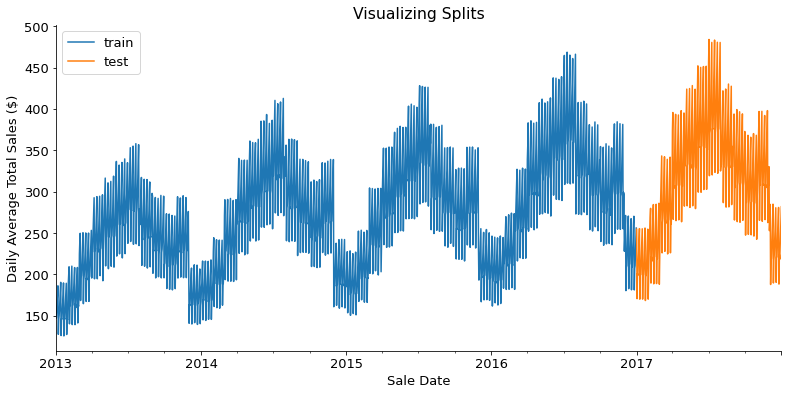

In [215]:
# take a look at plots to see if it worked
ax = train.plot(label='train')
test.plot(ax=ax, label='test')
plt.legend()
plt.title('Visualizing Splits')
plt.ylabel('Daily Average Total Sales ($)')
plt.xlabel('Sale Date');

In [216]:
# # going to try to replicate the % based approach
# train_size = .80
# test_size = .20

# train_end_index = round(s.shape[0] * train_size)
# train = s.iloc[:train_end_index]
# test = s.iloc[train_end_index:]

# ax = train.plot(label='train')
# test.plot(ax=ax, label='test')
# plt.legend();

In [217]:
# make a copy and reassign s to train
s = train.copy()

### Exploration

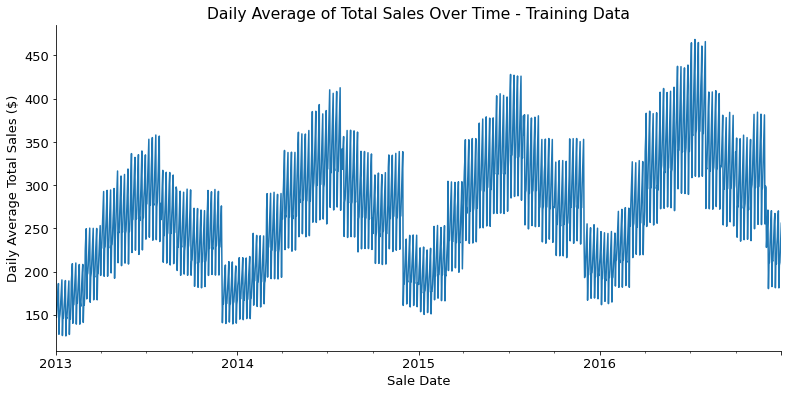

In [218]:
# plot training set
s.plot(title='Daily Average of Total Sales Over Time - Training Data')
plt.ylabel('Daily Average Total Sales ($)')
plt.xlabel('Sale Date');

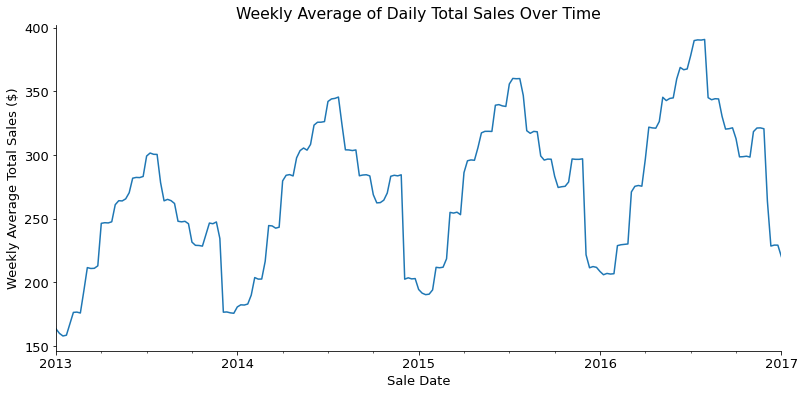

In [219]:
# resample to smooth plot
s.resample('W').mean().plot(title='Weekly Average of Daily Total Sales Over Time')
plt.ylabel('Weekly Average Total Sales ($)')
plt.xlabel('Sale Date');

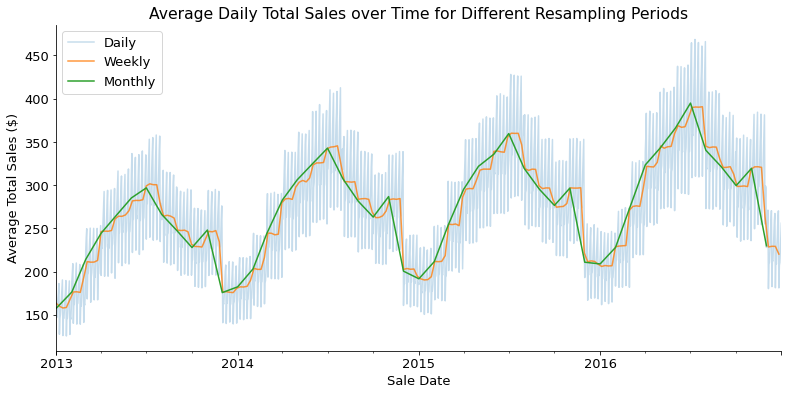

In [220]:
# combine multiple resampling periods on single viz
ax = s.resample('D').mean().plot(alpha=.25, label='Daily')
s.resample('W').mean().plot(ax=ax, alpha=.8, label='Weekly')
s.resample('M').mean().plot(ax=ax, label='Monthly')
ax.legend()
plt.title('Average Daily Total Sales over Time for Different Resampling Periods')
plt.ylabel('Average Total Sales ($)')
plt.xlabel('Sale Date');

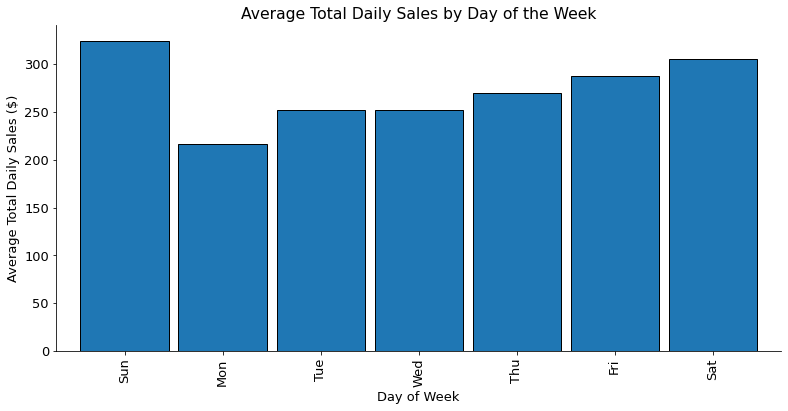

In [221]:
# take a look at sales on each day of the week
ax = s.groupby(s.index.strftime('%w-%a')).mean().plot.bar(width=.9, ec='black')
labels = ax.get_xticklabels()
ax.set_xticklabels([l.get_text()[2:] for l in labels])
plt.title('Average Total Daily Sales by Day of the Week')
plt.ylabel('Average Total Daily Sales ($)')
plt.xlabel('Day of Week');

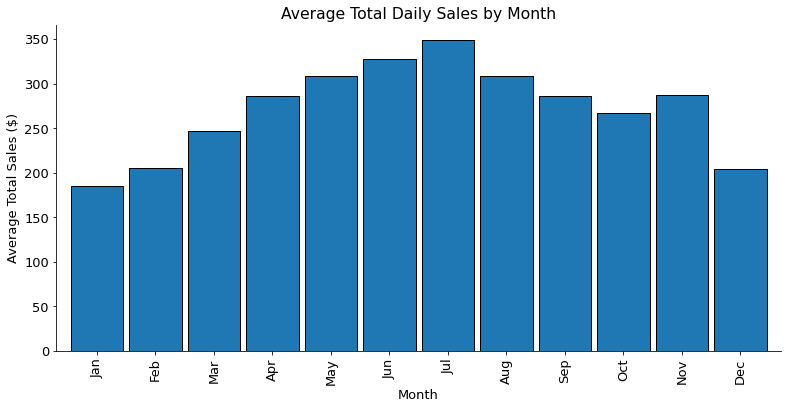

In [222]:
# take a look at sales on each day of the week
ax = s.groupby(s.index.strftime('%m-%b')).mean().plot.bar(width=.9, ec='black')
labels = ax.get_xticklabels()
ax.set_xticklabels([l.get_text()[3:] for l in labels])
plt.title('Average Total Daily Sales by Month')
plt.ylabel('Average Total Sales ($)')
plt.xlabel('Month');

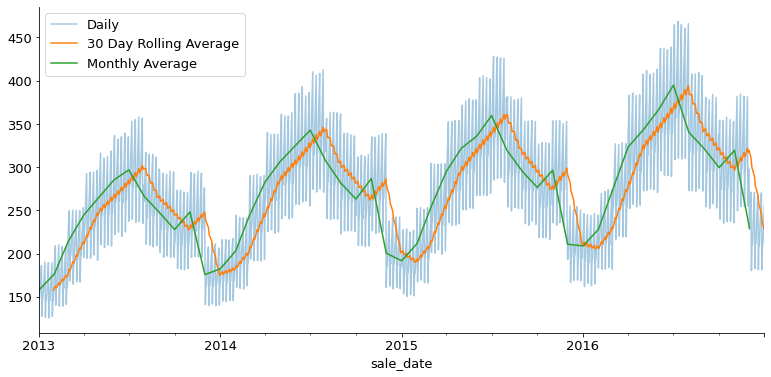

In [223]:
# moving average
ax = s.plot(label='Daily', alpha=.4)
s.resample('D').mean().rolling(30).mean().plot(ax=ax, label='30 Day Rolling Average')
s.resample('M').mean().plot(ax=ax, label='Monthly Average')
ax.legend();

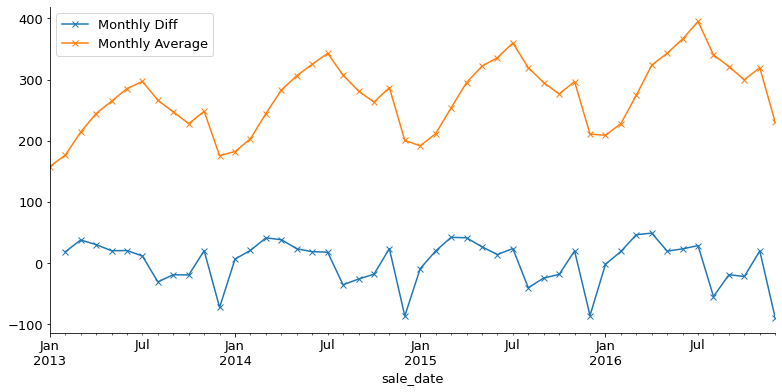

In [224]:
# monthly change in temperature
ax = s.resample('M').mean().diff().plot(label='Monthly Diff', marker='x')
s.resample('M').mean().plot(ax=ax, label='Monthly Average', marker='x')
plt.legend();

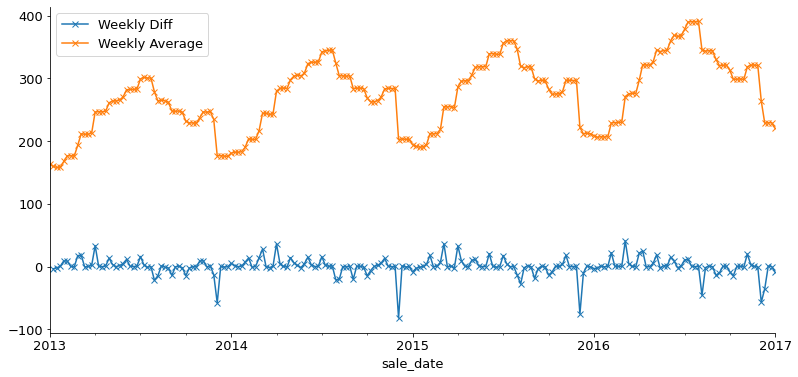

In [225]:
# weekly change in temperature
ax = s.resample('W').mean().diff().plot(label='Weekly Diff', marker='x')
s.resample('W').mean().plot(ax=ax, label='Weekly Average', marker='x')
plt.legend();

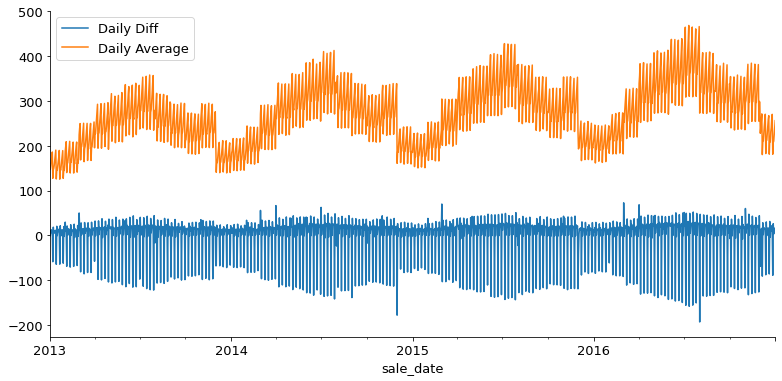

In [226]:
# daily change in temperature
ax = s.diff().plot(label='Daily Diff')
s.plot(ax=ax, label='Daily Average')
plt.legend();

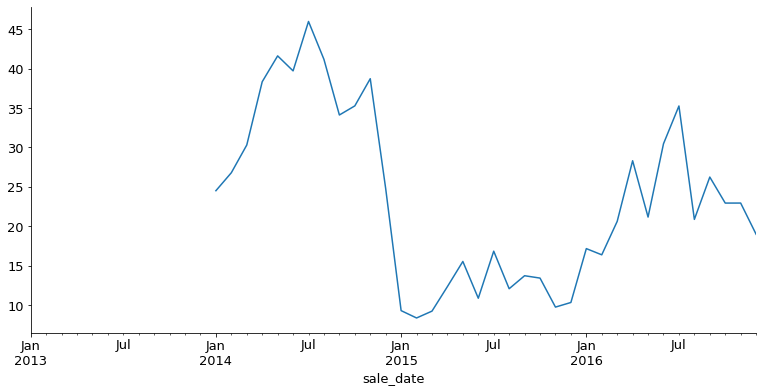

In [227]:
# difference in average daily sales for month and month from previous year
s.resample('M').mean().diff(12).plot();

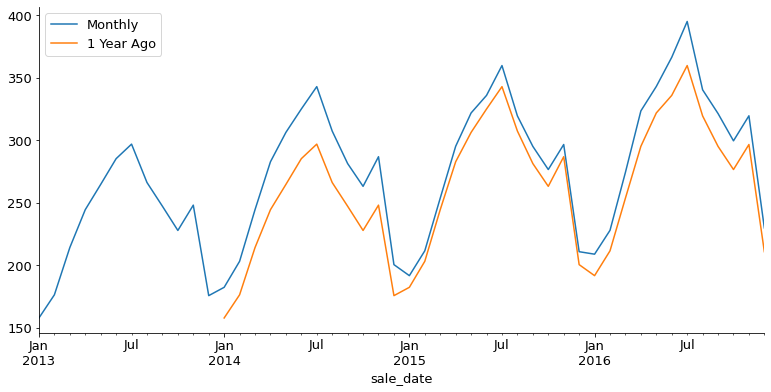

In [228]:
# use shift to overlay daily sales average for same month previous year
ax = s.resample('M').mean().plot(label='Monthly')
s.resample('M').mean().shift(12).plot(label='1 Year Ago', ax=ax)
ax.legend();

#### Seasonality

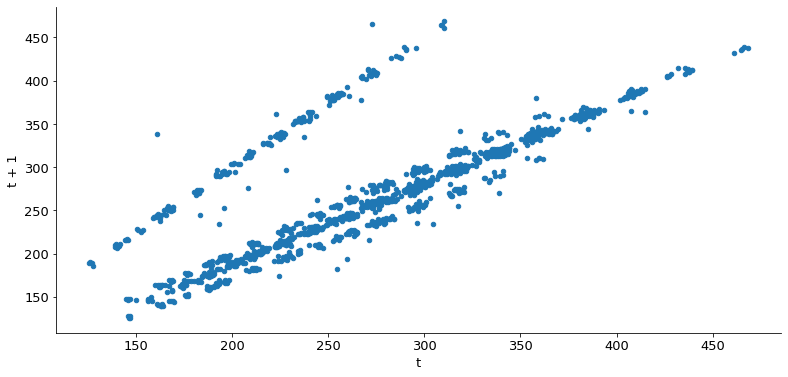

In [229]:
# lag plot

# We concatenate the series with itself shifted by 1 and then make a scatter plot of the two columns
pd.concat([s.rename('t'), s.shift().rename('t + 1')], axis=1).plot.scatter(y='t + 1', x='t');

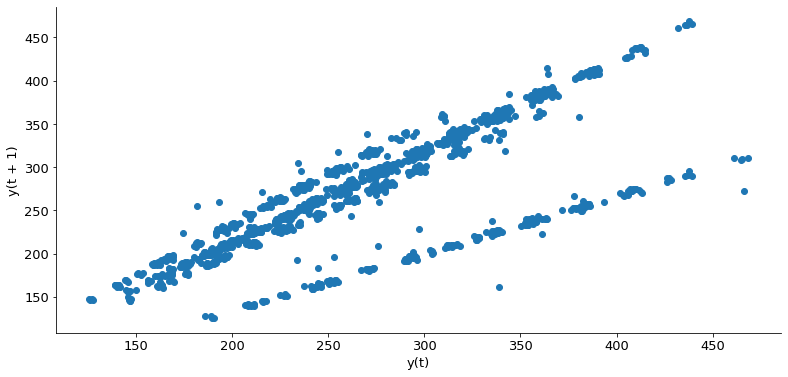

In [230]:
# note here we are using a pandas built-in to make our lag plot
pd.plotting.lag_plot(s, 1);

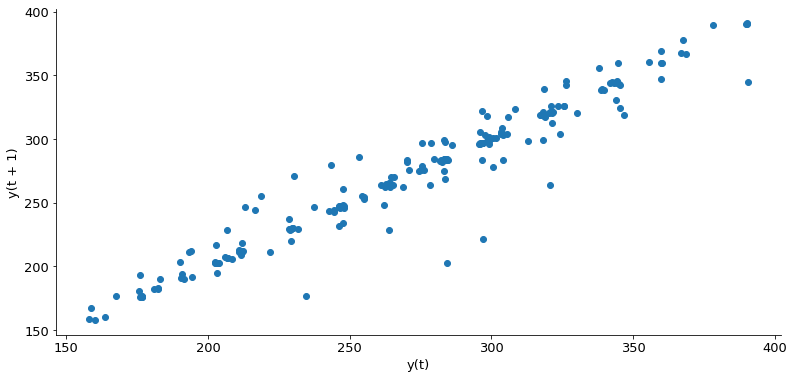

In [231]:
pd.plotting.lag_plot(s.resample('W').mean(), 1);

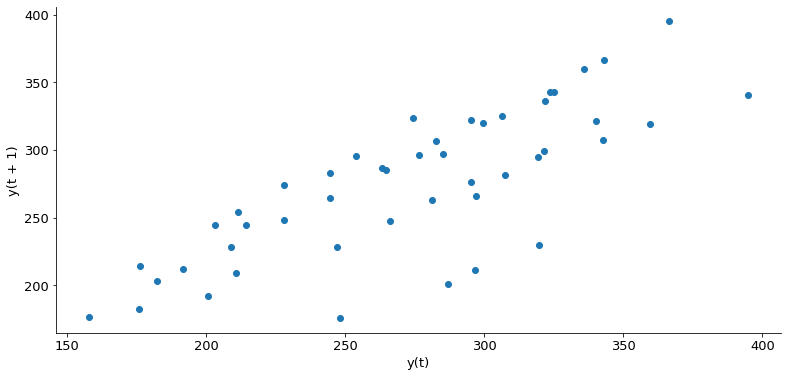

In [232]:
pd.plotting.lag_plot(s.resample('M').mean(), 1);

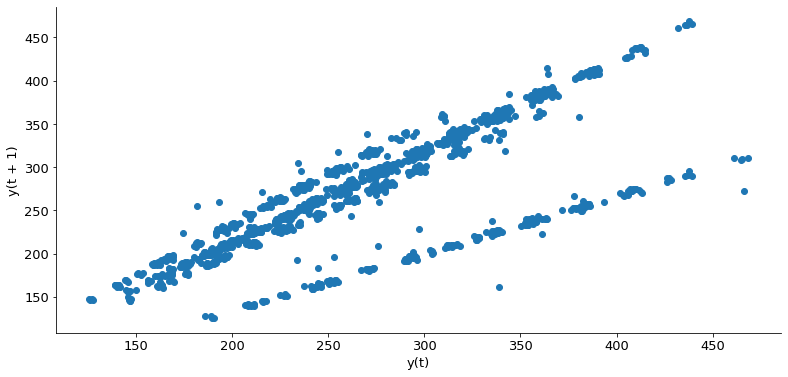

In [233]:
# note here we are using a pandas built-in to make our lag plot
pd.plotting.lag_plot(s, 1);

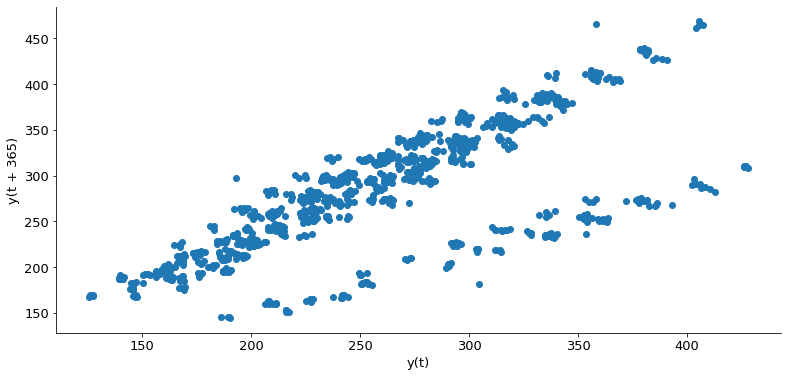

In [234]:
pd.plotting.lag_plot(s, 365);

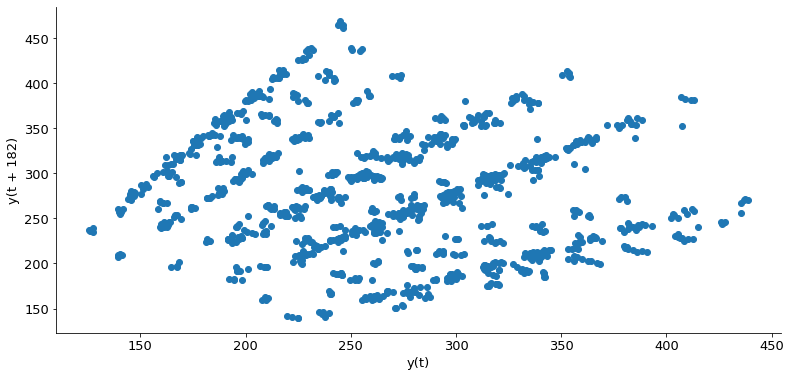

In [235]:
pd.plotting.lag_plot(s, round(365/2));

In [236]:
def autocorrelation(s, lag):
    return pd.concat([s, s.shift(lag)], axis=1).dropna().corr().iloc[0, 1]

In [237]:
autocorrelation(s, 1)

0.7490549907739905

In [238]:
autocorrelation(s.resample('W').mean(), 1)

0.9667062249619762

In [239]:
autocorrelation(s.resample('M').mean(), 1)

0.788821859803136

In [240]:
autocorr = pd.Series({lag: autocorrelation(s, lag) for lag in range(1, 365)})

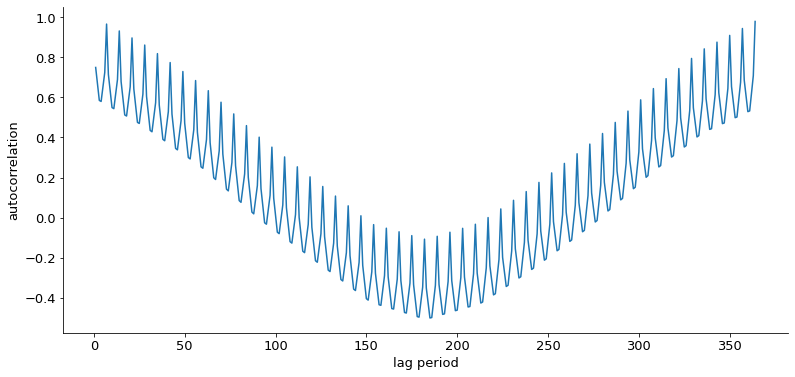

In [241]:
autocorr.plot(xlabel='lag period', ylabel='autocorrelation');

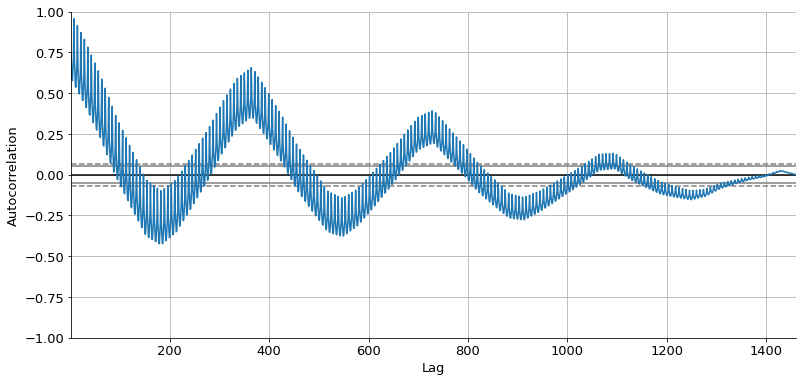

In [246]:
pd.plotting.autocorrelation_plot(s);

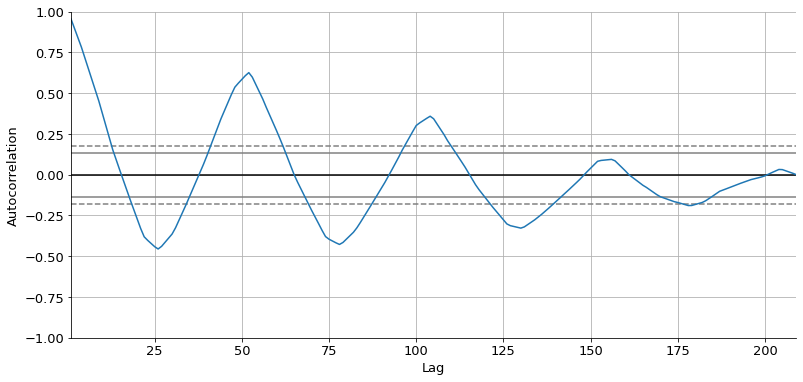

In [247]:
pd.plotting.autocorrelation_plot(s.resample('W').mean());

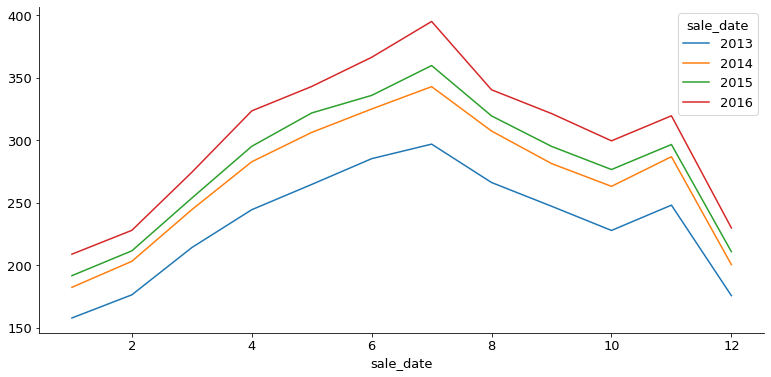

In [249]:
s.groupby([s.index.year, s.index.month]).mean().unstack(0).plot();

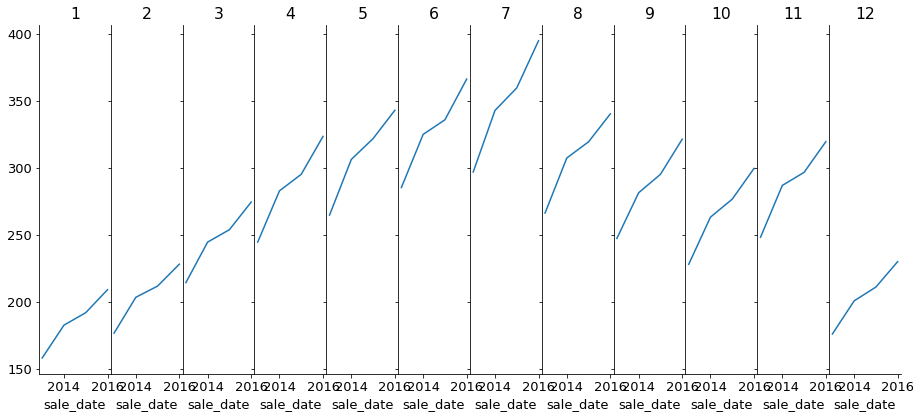

In [250]:
fig, axs = plt.subplots(1, 12, sharex=True, sharey=True)
for ax, (month, x) in zip(axs, s.groupby([s.index.year, s.index.month]).mean().unstack().iteritems()):
    x.plot(ax=ax, title=month)
fig.tight_layout()
fig.subplots_adjust(wspace=0)

#### Seasonal Decomposition

In [269]:
# using statsmodels
result = sm.tsa.seasonal_decompose(s.resample('W').mean(), model='additive')
result = pd.DataFrame(dict(
    Observed=result.observed,
    Residual=result.resid,
    Seasonal=result.seasonal,
    Trend=result.trend
))

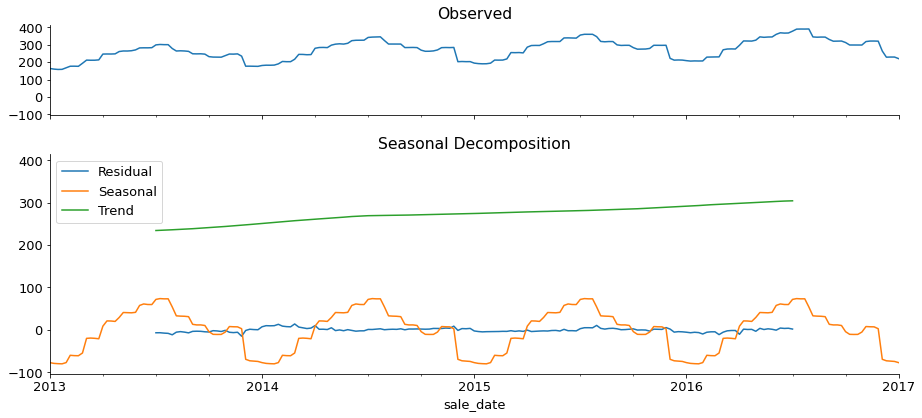

In [270]:
gs = plt.GridSpec(3, 1)
fig = plt.figure()
ax1 = fig.add_subplot(gs[1:])
ax2 = fig.add_subplot(gs[0], sharex=ax1, sharey=ax1)
result.iloc[:, 1:].plot(ax=ax1, title='Seasonal Decomposition')
result.Observed.plot(ax=ax2, title='Observed')
fig.tight_layout();

## OPS Data

In [271]:
df = p.get_clean_power_data()

In [272]:
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006
2006-01-04,1457.217,0.0,0.0,0.0,January,2006
2006-01-05,1477.131,0.0,0.0,0.0,January,2006


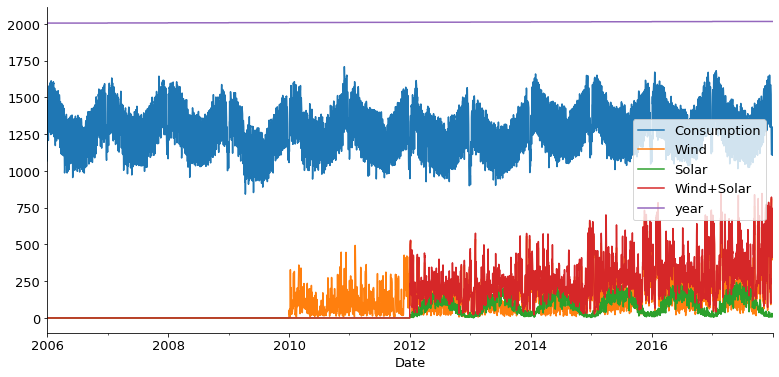

In [276]:
df.plot();

### Plan
- Take a look at daily comsumption for total, wind, and solar
    - Recreate all plots

### Split Data

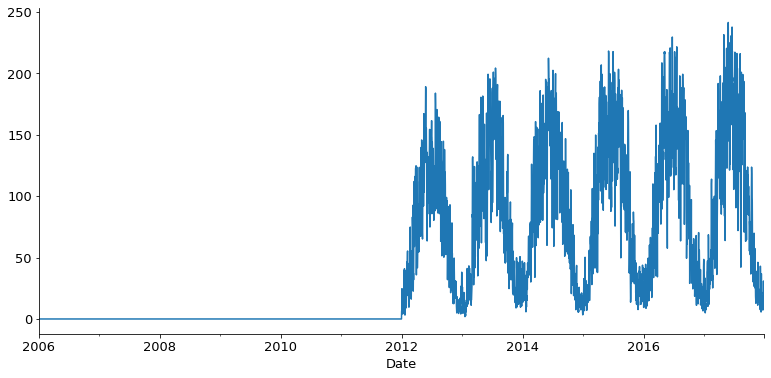

In [291]:
df.Solar.plot();

In [294]:
# eliminate rows with no data
s = df.Solar[df.Solar != 0]

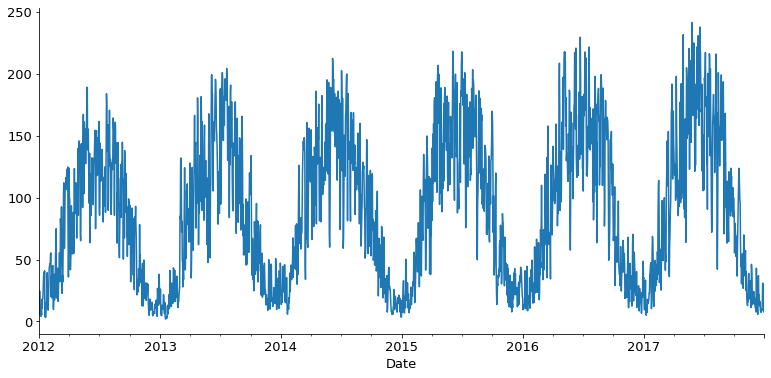

In [298]:
s.plot();

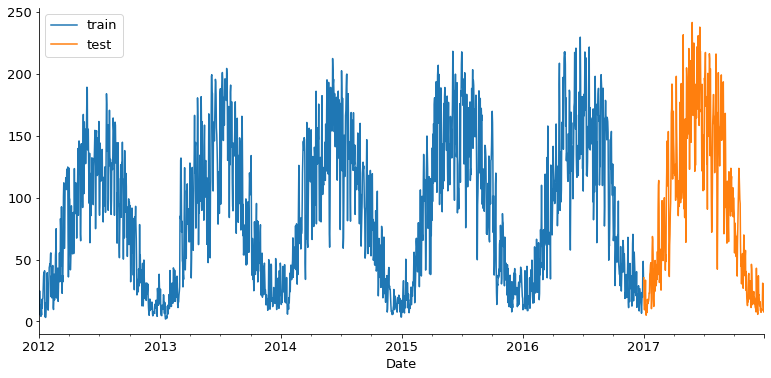

In [299]:
# and use 2017 as test split
train = s.loc[:'2016']
test = s.loc['2017']

ax = train.plot(label='train')
test.plot(ax=ax, label='test')
plt.legend();

In [302]:
# reassign train to s
s = train.copy()

### Exploration

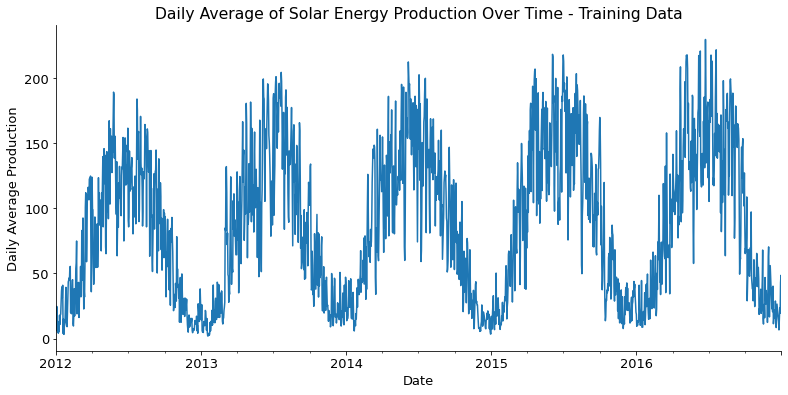

In [307]:
# plot training set
s.plot(title='Daily Average of Solar Energy Production Over Time - Training Data')
plt.ylabel('Daily Average Production')
plt.xlabel('Date');

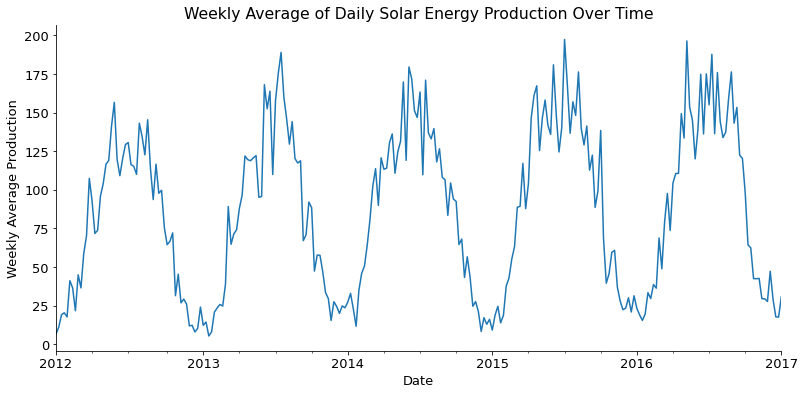

In [308]:
# resample to smooth plot
s.resample('W').mean().plot(title='Weekly Average of Daily Solar Energy Production Over Time')
plt.ylabel('Weekly Average Production')
plt.xlabel('Date');

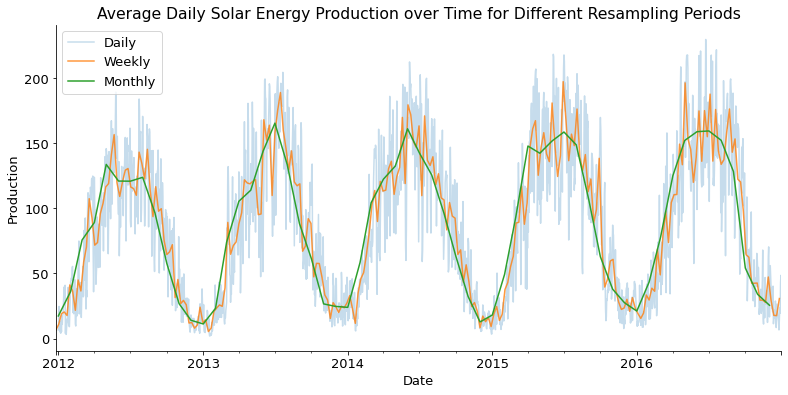

In [310]:
# combine multiple resampling periods on single viz
ax = s.resample('D').mean().plot(alpha=.25, label='Daily')
s.resample('W').mean().plot(ax=ax, alpha=.8, label='Weekly')
s.resample('M').mean().plot(ax=ax, label='Monthly')
ax.legend()
plt.title('Average Daily Solar Energy Production over Time for Different Resampling Periods')
plt.ylabel('Production')
plt.xlabel('Date');

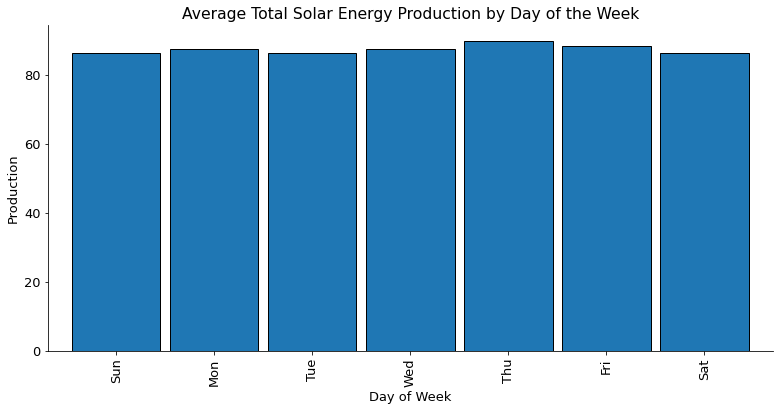

In [311]:
# take a look at sales on each day of the week
ax = s.groupby(s.index.strftime('%w-%a')).mean().plot.bar(width=.9, ec='black')
labels = ax.get_xticklabels()
ax.set_xticklabels([l.get_text()[2:] for l in labels])
plt.title('Average Total Solar Energy Production by Day of the Week')
plt.ylabel('Production')
plt.xlabel('Day of Week');

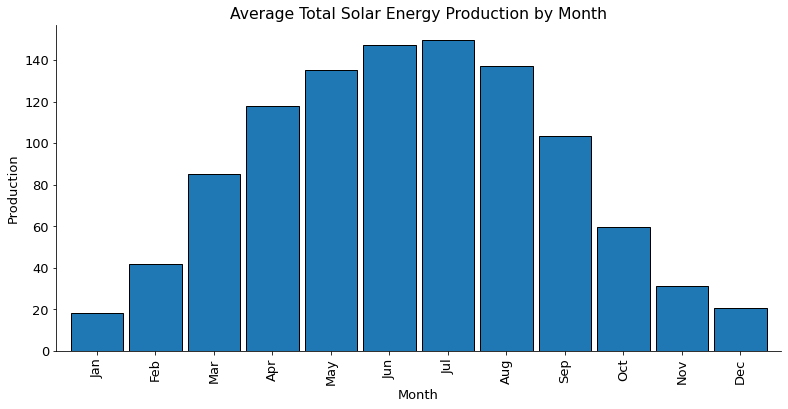

In [312]:
# take a look at sales on each day of the week
ax = s.groupby(s.index.strftime('%m-%b')).mean().plot.bar(width=.9, ec='black')
labels = ax.get_xticklabels()
ax.set_xticklabels([l.get_text()[3:] for l in labels])
plt.title('Average Total Solar Energy Production by Month')
plt.ylabel('Production')
plt.xlabel('Month');

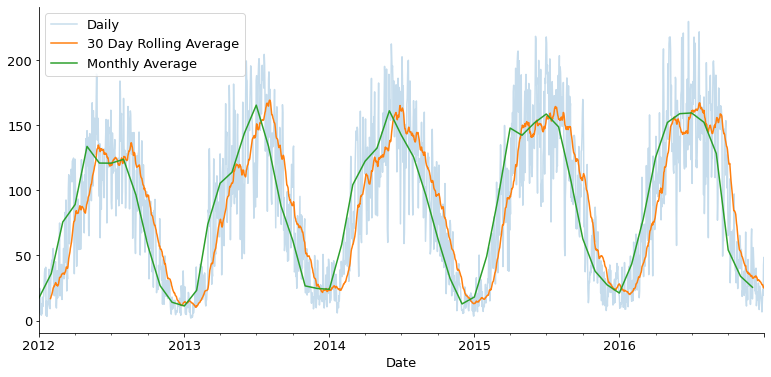

In [314]:
# moving average
ax = s.plot(label='Daily', alpha=.25)
s.resample('D').mean().rolling(30).mean().plot(ax=ax, label='30 Day Rolling Average')
s.resample('M').mean().plot(ax=ax, label='Monthly Average')
ax.legend();

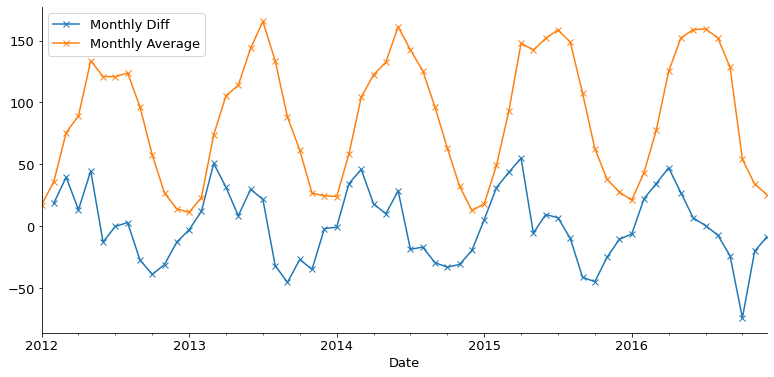

In [315]:
# monthly change
ax = s.resample('M').mean().diff().plot(label='Monthly Diff', marker='x')
s.resample('M').mean().plot(ax=ax, label='Monthly Average', marker='x')
plt.legend();

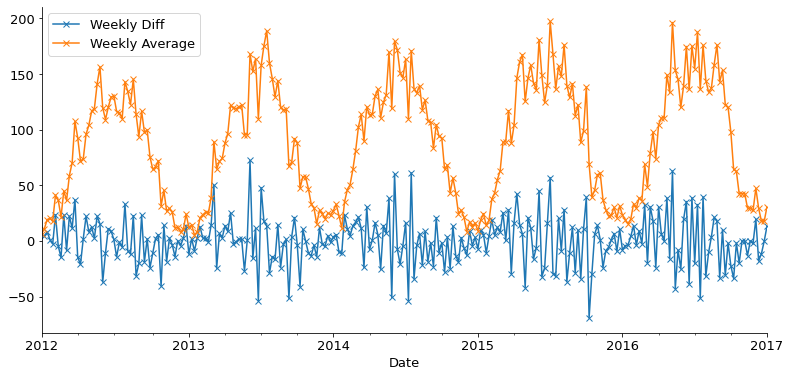

In [316]:
# weekly change in temperature
ax = s.resample('W').mean().diff().plot(label='Weekly Diff', marker='x')
s.resample('W').mean().plot(ax=ax, label='Weekly Average', marker='x')
plt.legend();

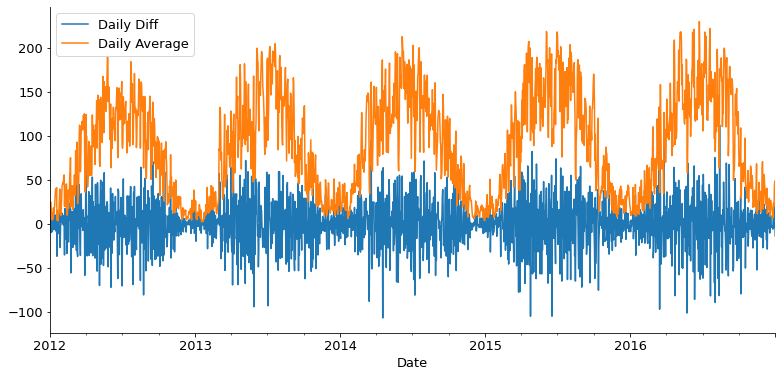

In [317]:
# daily change in temperature
ax = s.diff().plot(label='Daily Diff')
s.plot(ax=ax, label='Daily Average')
plt.legend();

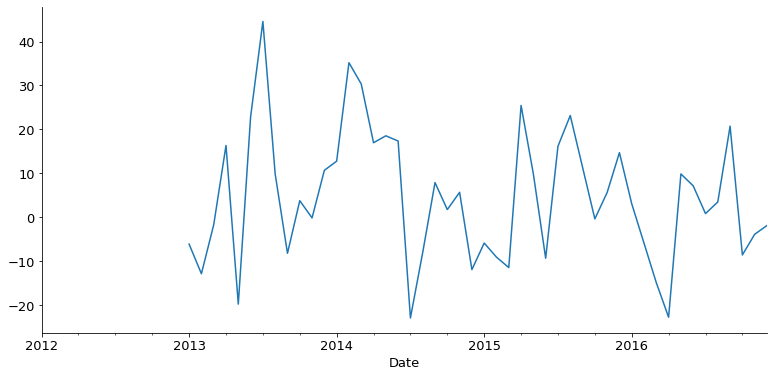

In [318]:
# difference in average daily sales for month and month from previous year
s.resample('M').mean().diff(12).plot();

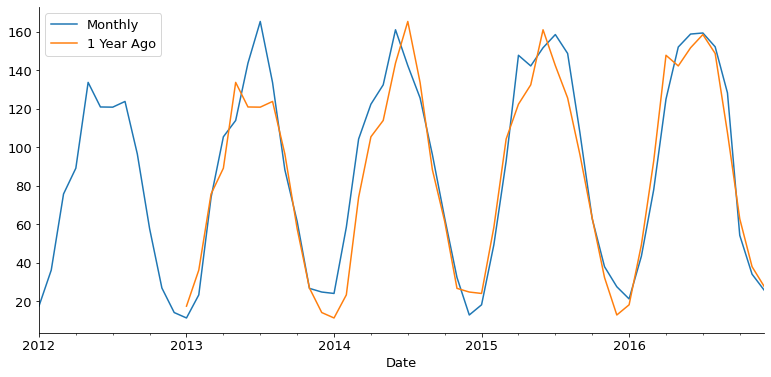

In [319]:
# use shift to overlay daily sales average for same month previous year
ax = s.resample('M').mean().plot(label='Monthly')
s.resample('M').mean().shift(12).plot(label='1 Year Ago', ax=ax)
ax.legend();

#### Seasonality

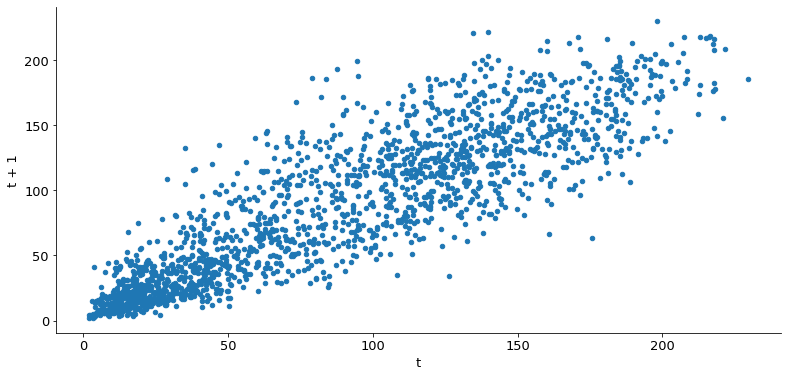

In [320]:
# lag plot

# We concatenate the series with itself shifted by 1 and then make a scatter plot of the two columns
pd.concat([s.rename('t'), s.shift().rename('t + 1')], axis=1).plot.scatter(y='t + 1', x='t');

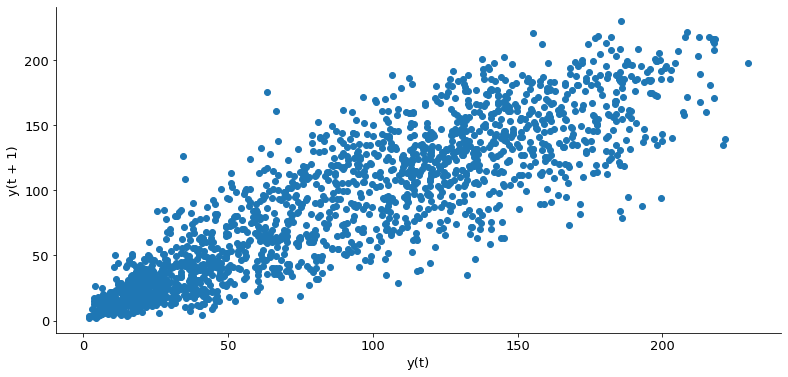

In [321]:
# note here we are using a pandas built-in to make our lag plot
pd.plotting.lag_plot(s, 1);

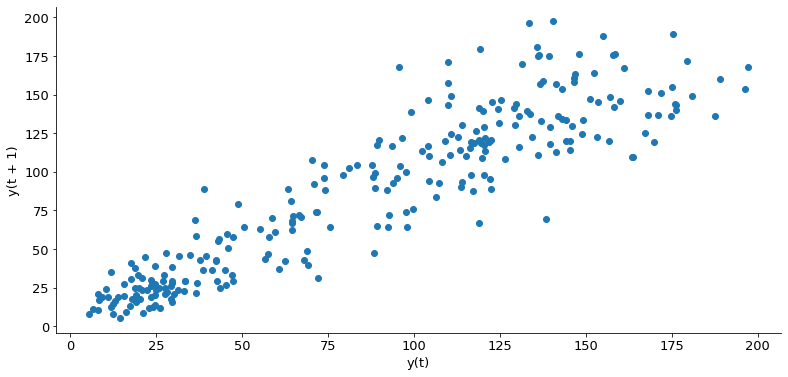

In [322]:
pd.plotting.lag_plot(s.resample('W').mean(), 1);

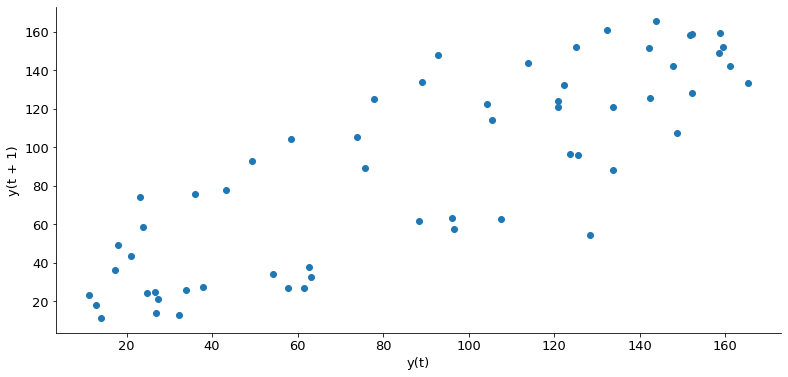

In [323]:
pd.plotting.lag_plot(s.resample('M').mean(), 1);

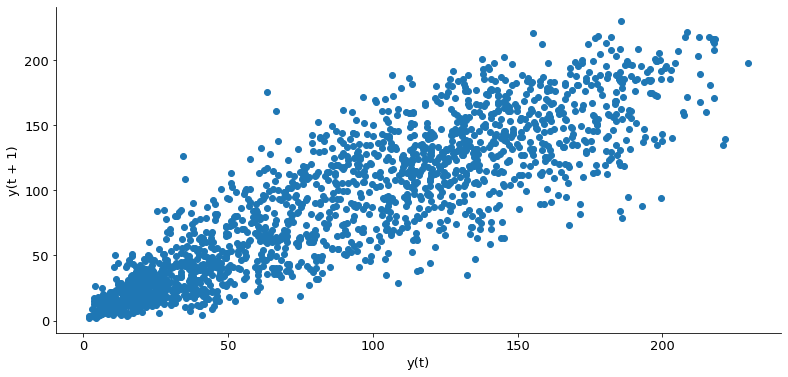

In [324]:
# note here we are using a pandas built-in to make our lag plot
pd.plotting.lag_plot(s, 1);

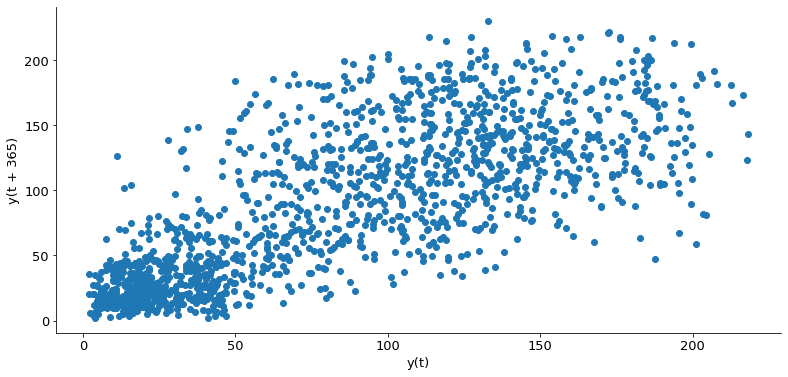

In [325]:
pd.plotting.lag_plot(s, 365);

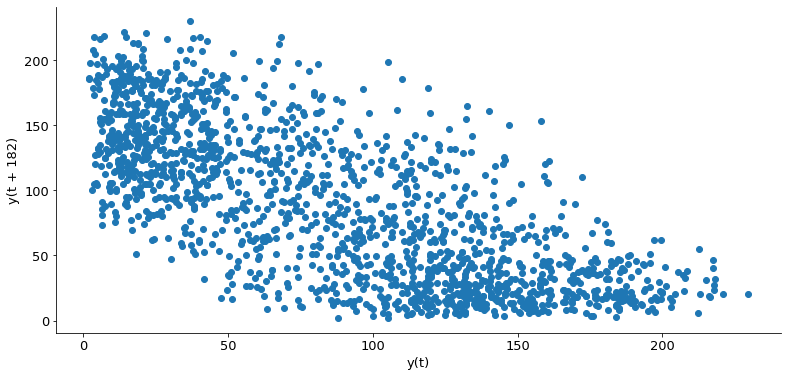

In [326]:
pd.plotting.lag_plot(s, round(365/2));

In [327]:
def autocorrelation(s, lag):
    return pd.concat([s, s.shift(lag)], axis=1).dropna().corr().iloc[0, 1]

In [328]:
autocorrelation(s, 1)

0.8792231976656176

In [329]:
autocorrelation(s.resample('W').mean(), 1)

0.9118531136968879

In [330]:
autocorrelation(s.resample('M').mean(), 1)

0.8354118039064311

In [331]:
autocorr = pd.Series({lag: autocorrelation(s, lag) for lag in range(1, 365)})

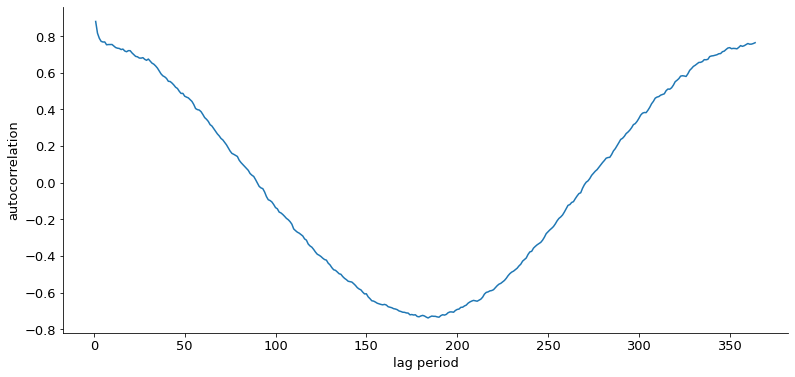

In [332]:
autocorr.plot(xlabel='lag period', ylabel='autocorrelation');

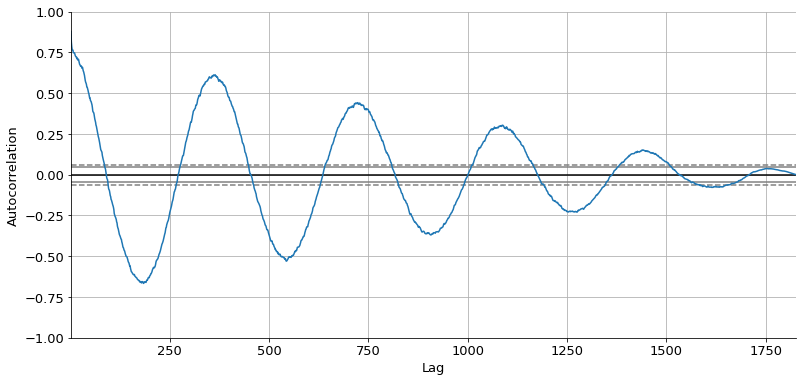

In [333]:
pd.plotting.autocorrelation_plot(s);

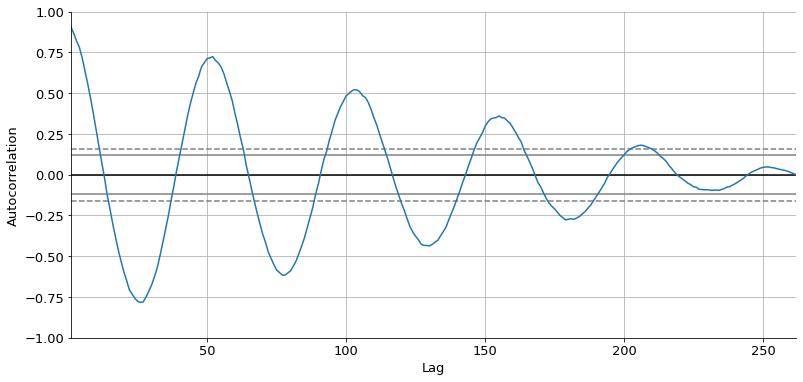

In [334]:
pd.plotting.autocorrelation_plot(s.resample('W').mean());

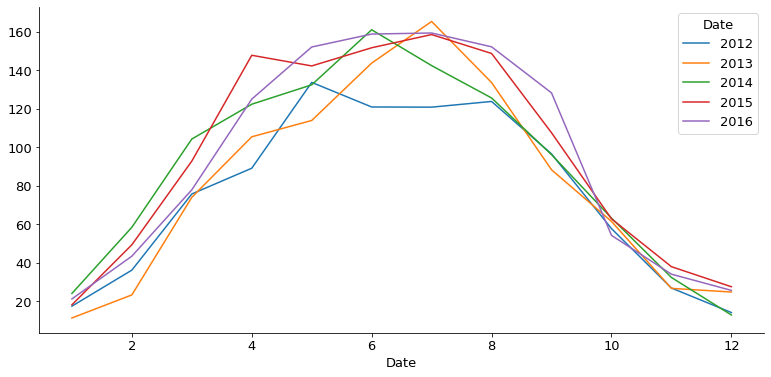

In [335]:
s.groupby([s.index.year, s.index.month]).mean().unstack(0).plot();

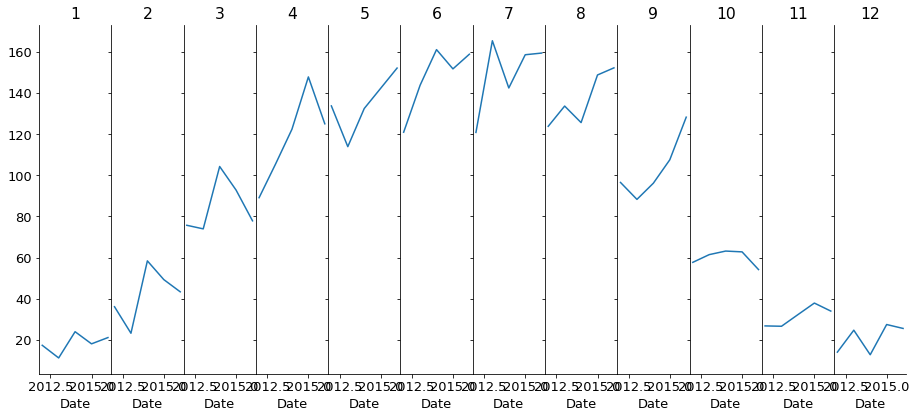

In [336]:
fig, axs = plt.subplots(1, 12, sharex=True, sharey=True)
for ax, (month, x) in zip(axs, s.groupby([s.index.year, s.index.month]).mean().unstack().iteritems()):
    x.plot(ax=ax, title=month)
fig.tight_layout()
fig.subplots_adjust(wspace=0)

#### Seasonal Decomposition

In [337]:
# using statsmodels
result = sm.tsa.seasonal_decompose(s.resample('W').mean(), model='additive')
result = pd.DataFrame(dict(
    Observed=result.observed,
    Residual=result.resid,
    Seasonal=result.seasonal,
    Trend=result.trend
))

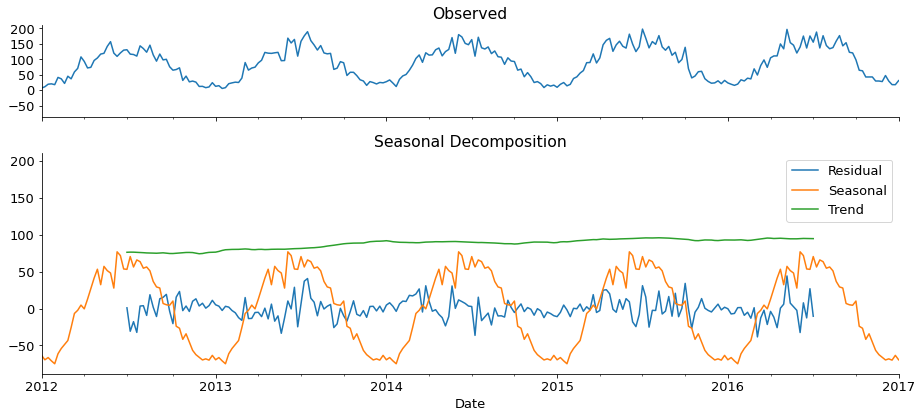

In [338]:
gs = plt.GridSpec(3, 1)
fig = plt.figure()
ax1 = fig.add_subplot(gs[1:])
ax2 = fig.add_subplot(gs[0], sharex=ax1, sharey=ax1)
result.iloc[:, 1:].plot(ax=ax1, title='Seasonal Decomposition')
result.Observed.plot(ax=ax2, title='Observed')
fig.tight_layout();

In [341]:
# using statsmodels
result = sm.tsa.seasonal_decompose(s, model='additive')
result = pd.DataFrame(dict(
    Observed=result.observed,
    Residual=result.resid,
    Seasonal=result.seasonal,
    Trend=result.trend
))

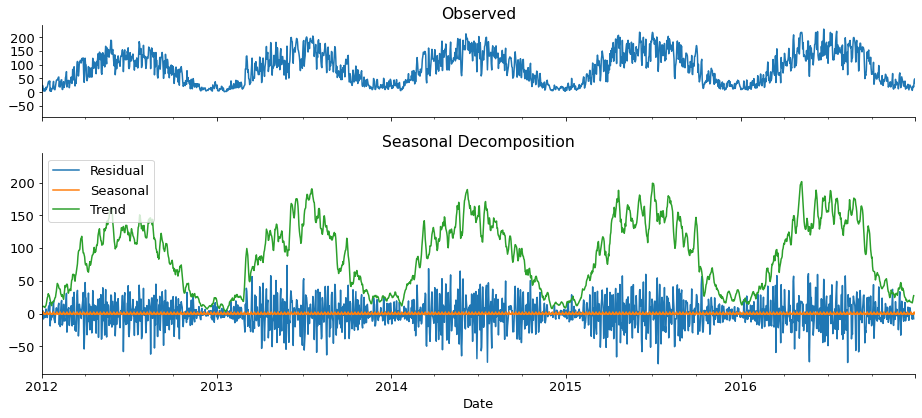

In [342]:
gs = plt.GridSpec(3, 1)
fig = plt.figure()
ax1 = fig.add_subplot(gs[1:])
ax2 = fig.add_subplot(gs[0], sharex=ax1, sharey=ax1)
result.iloc[:, 1:].plot(ax=ax1, title='Seasonal Decomposition')
result.Observed.plot(ax=ax2, title='Observed')
fig.tight_layout();